In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"]=(8,6)

In [5]:
my1 = mpimg.imread("images/my.jpg")

In [6]:
my1.shape

(480, 640, 3)

In [7]:
type(my1)

numpy.ndarray

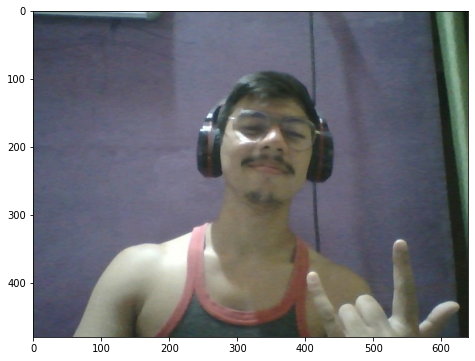

In [8]:
plt.imshow(my1)

In [9]:
# using cv2 to read image data

my_cv2 = cv2.imread("images/my.jpg")

In [10]:
my_cv2.shape

(480, 640, 3)

cv2.imshow("myImage", my_cv2)
cv2.waitKey(0)
cv2.destroyWindow('myImage')

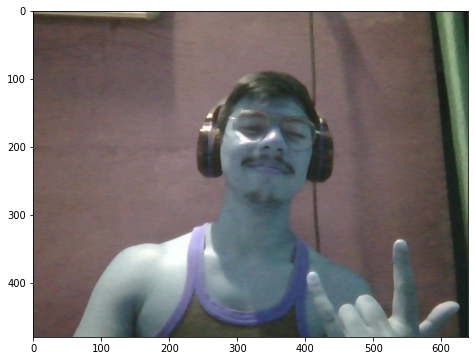

In [12]:
# Color is different due to reading process
# cv2 read as BGR and matplotlib read as RGB
plt.imshow(my_cv2)

In [13]:
#After Converting BGR TO RGB
my_cv2_BGR_RGB = cv2.cvtColor(my_cv2, cv2.COLOR_BGR2RGB)

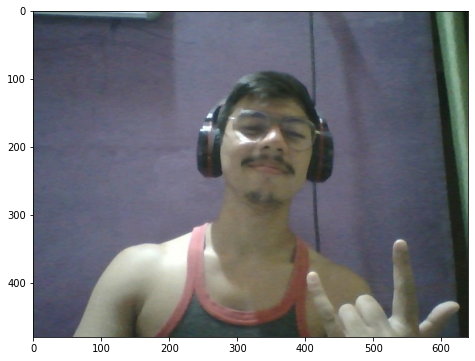

In [14]:
plt.imshow(my_cv2_BGR_RGB)

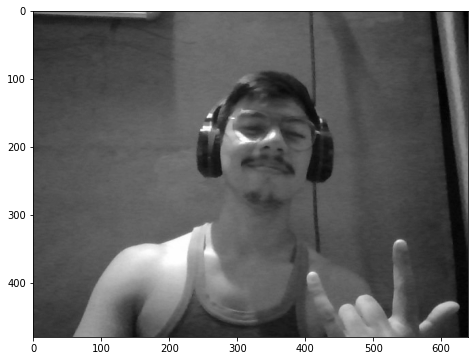

In [15]:
#After Converting BGR TO GRAY
my_cv2_BGR_GRAY = cv2.cvtColor(my_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(my_cv2_BGR_GRAY, cmap="gray")

In [17]:
# 2D data Only contain Black and white data
my_cv2_BGR_GRAY.shape

(480, 640)

In [19]:
# Saving this Gray image
cv2.imwrite("images/my_gray.jpeg",my_cv2_BGR_GRAY)

True

## Understanding the composition of all the RGB images

In [23]:
def visulize_RGB_chanels(imgArray=None, fig_size=(10,7)):
    # Splitting The RGB Component
    B, G, R = cv2.split(imgArray)
    
    # Zero Metrix
    Z = np.zeros(B.shape, dtype = B.dtype)
    
    # initilization of plt subplot
    fig, ax = plt.subplots(2,2, figsize=fig_size)
    
    # setting axis off
    [axi.set_axis_off() for axi in ax.ravel()]
    
    # Plotting
    ax[0,0].set_title("Orignal Image")
    ax[0,0].imshow(cv2.merge((R,G,B)))
    
    ax[0,1].set_title("Blue Image")
    ax[0,1].imshow(cv2.merge((Z,Z,B)))
    
    ax[1,0].set_title("Red Image")
    ax[1,0].imshow(cv2.merge((R,Z,Z)))
    
    ax[1,1].set_title("Green Image")
    ax[1,1].imshow(cv2.merge((Z,G,Z)))

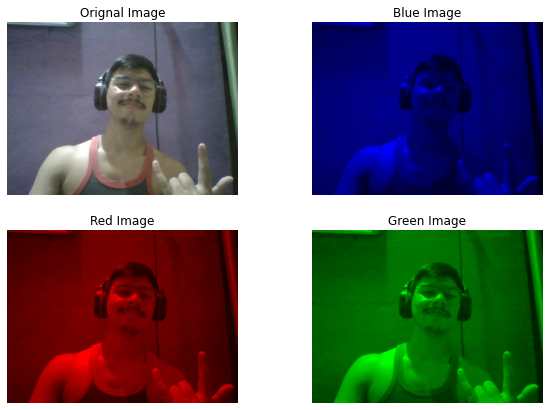

In [24]:
visulize_RGB_chanels(imgArray=my_cv2)

In [29]:
# Making Random color image
random_color_image = np.random.randint(0,255,(4,4,3))
random_color_image.shape

(4, 4, 3)

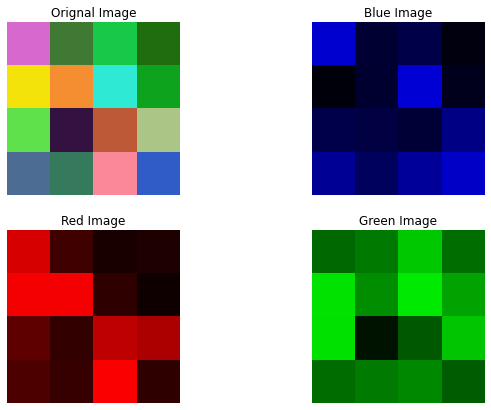

In [30]:
visulize_RGB_chanels(imgArray=random_color_image)

## Understanding Filters

In [31]:
# Sobel filters
# this will detect all vertical edges in images
sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [32]:
# Creating an dummy image

example1 = [[0,0,0,255,255,255],
           [0,0,0,255,255,255],
           [0,0,0,255,255,255],
           [0,0,0,255,255,255],
           [0,0,0,255,255,255],
           [0,0,0,255,255,255]]

example1 = np.array(example1)

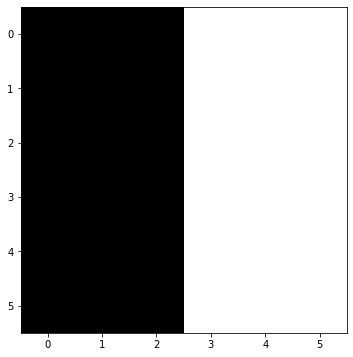

In [34]:
plt.imshow(example1, cmap='gray')

### Applying Sobel filter

In [38]:
def find_edge(imgFiter=None, picture=None):
    # Extract row and column of picture
    p_row, p_col = picture.shape 
    
    #filter shape
    k = imgFiter.shape[0] # k=3
    
    temp = list()
    
    # stride = how many rows taking
    stride=1
    # resultant row and columns
    final_col = (p_col - k)//stride + 1
    final_row = (p_row - k)//stride + 1
    
    # take row by row
    for v_stride in range(final_row):
        # take col in that row
        for h_stride in range(final_col):
            target_area_of_pic = picture[v_stride:v_stride + k, h_stride:h_stride + k]
            temp.append(sum(sum(imgFiter*target_area_of_pic)))
            
    return np.array(temp).reshape(final_row, final_col)

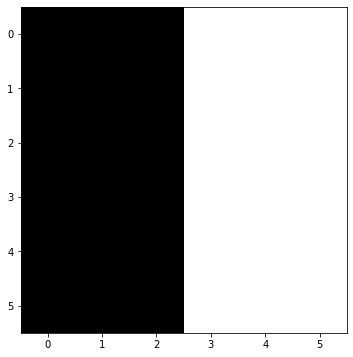

In [39]:
plt.imshow(example1, cmap='gray')

In [40]:
result = find_edge(sobel, example1)
result

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

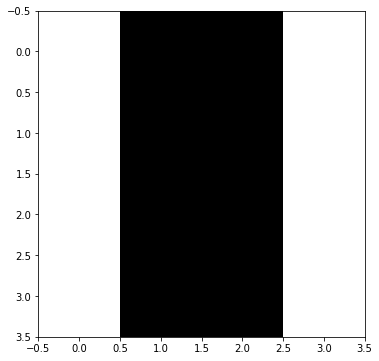

In [42]:
plt.imshow(result, cmap='gray')

- this show the vertical edge is at center

In [43]:
# Finding horigental edge in given figure
result_t = find_edge(sobel.T, example1)
result_t

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

- Didn't find any edge in example

### Applying Sobel filter in my grey image

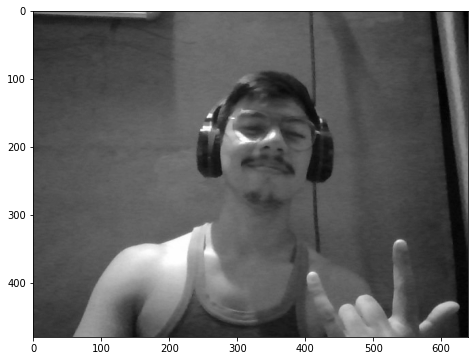

In [44]:
plt.imshow(my_cv2_BGR_GRAY, cmap="gray")

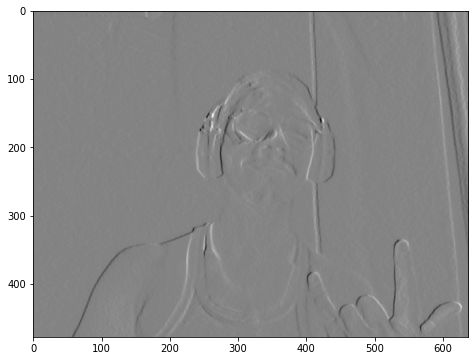

In [45]:
# Using vertical line detection filter
my_vertical = find_edge(sobel, my_cv2_BGR_GRAY)
plt.imshow(my_vertical, cmap='gray')

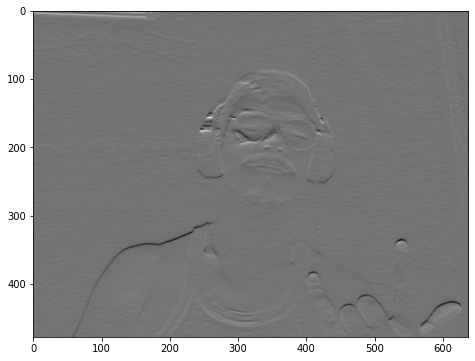

In [46]:
# using Horizontal detection tech
my_horizontal = find_edge(sobel.T, my_cv2_BGR_GRAY)
plt.imshow(my_horizontal, cmap='gray')

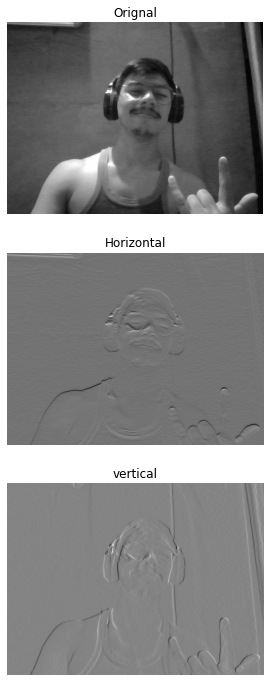

In [55]:
fig, ax = plt.subplots(3,1, figsize = (6,12))

[axi.set_axis_off() for axi in ax.ravel()]

ax[0].set_title("Orignal")
ax[0].imshow(my_cv2_BGR_GRAY, cmap="gray")

ax[1].set_title("Horizontal")
ax[1].imshow(my_horizontal, cmap="gray")

ax[2].set_title("vertical")
ax[2].imshow(my_vertical, cmap="gray")

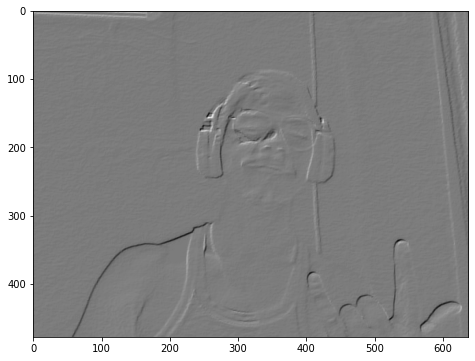

In [56]:
# Combinig both image we have
my_combo = my_horizontal + my_vertical

plt.imshow(my_combo, cmap='gray')